In [1]:
# 忽略警告提示
import warnings
warnings.filterwarnings('ignore')

#导入处理数据包
import numpy as np
import pandas as pd

# 数据集查看

In [2]:
#导入数据
#训练数据集
train = pd.read_csv("data/train.csv")
#测试数据集
test  = pd.read_csv("data/test.csv")
print ('训练数据集:',train.shape,'测试数据集:',test.shape)

训练数据集: (891, 12) 测试数据集: (418, 11)


测试数据集少一个变量（Survived）

In [3]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


需要使用train.csv中的特征来预测test.csv中的标签，先合并两个表格。

In [5]:
rowNum_train=train.shape[0]
rowNum_test=test.shape[0]
print('训练数据集有多少行数据：',rowNum_train,
     ',测试数据集有多少行数据：',rowNum_test,)
#合并数据集，方便同时对两个数据集进行清洗
full = train.append( test , ignore_index = True )
print ('合并后的数据集:',full.shape)

训练数据集有多少行数据： 891 ,测试数据集有多少行数据： 418
合并后的数据集: (1309, 12)


In [6]:
full.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
dtypes: float64(3), int64(4), object(5)
memory usage: 122.8+ KB


其中数据类型列：年龄（Age）、船舱号（Cabin）里面有缺失数据：

1）年龄（Age）里面数据总数是1046条，缺失了1309-1046=263，缺失率263/1309=20%

2）船票价格（Fare）里面数据总数是1308条，缺失了1条数据

字符串列：

1）登船港口（Embarked）里面数据总数是1307，只缺失了2条数据

2）船舱号（Cabin）里面数据总数是295，缺失了1309-295=1014，缺失率=1014/1309=77.5%

# 缺省值处理

用平均数来填充数值类型数据

In [8]:
print('处理前：')
full.info()
#年龄(Age)
full['Age']=full['Age'].fillna( full['Age'].mean() )
#船票价格(Fare)
full['Fare'] = full['Fare'].fillna( full['Fare'].mean() )
print('处理后：')
full.info()

处理前：
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
dtypes: float64(3), int64(4), object(5)
memory usage: 122.8+ KB
处理后：
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64 

In [9]:
full['Embarked'].value_counts()

S    914
C    270
Q    123
Name: Embarked, dtype: int64

字符类型数据，用最多值填充

In [10]:
full['Embarked'] = full['Embarked'].fillna( 'S' )

In [11]:
full['Cabin'].value_counts()

C23 C25 C27        6
G6                 5
B57 B59 B63 B66    5
C22 C26            4
F33                4
                  ..
A14                1
E63                1
E12                1
E38                1
C105               1
Name: Cabin, Length: 186, dtype: int64

In [12]:
full['Cabin'] = full['Cabin'].fillna( 'U' )

In [13]:
full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1309 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1309 non-null   float64
 10  Cabin        1309 non-null   object 
 11  Embarked     1309 non-null   object 
dtypes: float64(3), int64(4), object(5)
memory usage: 122.8+ KB


# 特征提取

## 性别特征提取

In [14]:
full['Sex'].value_counts()

male      843
female    466
Name: Sex, dtype: int64

将性别的值映射为数值
男（male）对应数值1，女（female）对应数值0

In [15]:
full['Sex'] =full['Sex'].apply(lambda x: 1 if x == "male" else 0)
full.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,U,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,U,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,U,S


## 登船港口特征提取

In [16]:
full['Embarked'].head()

0    S
1    C
2    S
3    S
4    S
Name: Embarked, dtype: object

In [17]:
#存放提取后的特征
embarkedDf = pd.DataFrame()

使用get_dummies进行one-hot编码，产生虚拟变量（dummy variables），列名前缀是Embarked

In [18]:
embarkedDf = pd.get_dummies( full['Embarked'] , prefix='Embarked' )
embarkedDf.head()

,Embarked_C,Embarked_Q,Embarked_S
0,0,0,1
1,1,0,0
2,0,0,1
3,0,0,1
4,0,0,1


In [19]:
full = pd.concat([full,embarkedDf],axis=1)#添加one-hot编码产生的虚拟变量（dummy variables）
full.drop('Embarked',axis=1,inplace=True)#删除登船港口(Embarked)
full.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked_C,Embarked_Q,Embarked_S
0,1,0.0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,U,0,0,1
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,1,0,0
2,3,1.0,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,U,0,0,1
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,0,0,1
4,5,0.0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,U,0,0,1


## 提取客舱等级特征

In [20]:
'''
客舱等级(Pclass):
1=1等舱，2=2等舱，3=3等舱
'''
#存放提取后的特征
pclassDf = pd.DataFrame()

#使用get_dummies进行one-hot编码，列名前缀是Pclass
pclassDf = pd.get_dummies( full['Pclass'] , prefix='Pclass' )
pclassDf.head()

,Pclass_1,Pclass_2,Pclass_3
0,0,0,1
1,1,0,0
2,0,0,1
3,1,0,0
4,0,0,1


In [21]:
full = pd.concat([full,pclassDf],axis=1)#添加one-hot编码产生的虚拟变量（dummy variables）
full.drop('Pclass',axis=1,inplace=True)#删掉客舱等级（Pclass）这一列
full.head()

,PassengerId,Survived,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked_C,Embarked_Q,Embarked_S,Pclass_1,Pclass_2,Pclass_3
0,1,0.0,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,U,0,0,1,0,0,1
1,2,1.0,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,1,0,0,1,0,0
2,3,1.0,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,U,0,0,1,0,0,1
3,4,1.0,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,0,0,1,1,0,0
4,5,0.0,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,U,0,0,1,0,0,1


## 提取名字特征

In [22]:
full[ 'Name' ].head()
'''
定义函数：从姓名中获取头衔
'''
def getTitle(name):
    str1=name.split( ',' )[1] #Mr. Owen Harris
    str2=str1.split( '.' )[0]#Mr
    #strip() #方法用于移除字符串头尾指定的字符（默认为空格）
    str3=str2.strip()
    return str3
#存放提取后的特征
titleDf = pd.DataFrame()
#map函数：对Series每个数据应用自定义的函数计算
titleDf['Title'] = full['Name'].map(getTitle)
titleDf.head()

,Title
0,Mr
1,Mrs
2,Miss
3,Mrs
4,Mr


In [23]:
'''
定义以下几种头衔类别：
Officer政府官员
Royalty王室（皇室）
Mr已婚男士
Mrs已婚妇女
Miss年轻未婚女子
Master有技能的人/教师
'''
#姓名中头衔字符串与定义头衔类别的映射关系
title_mapDict = {
                    "Capt":       "Officer",
                    "Col":        "Officer",
                    "Major":      "Officer",
                    "Jonkheer":   "Royalty",
                    "Don":        "Royalty",
                    "Sir" :       "Royalty",
                    "Dr":         "Officer",
                    "Rev":        "Officer",
                    "the Countess":"Royalty",
                    "Dona":       "Royalty",
                    "Mme":        "Mrs",
                    "Mlle":       "Miss",
                    "Ms":         "Mrs",
                    "Mr" :        "Mr",
                    "Mrs" :       "Mrs",
                    "Miss" :      "Miss",
                    "Master" :    "Master",
                    "Lady" :      "Royalty"
                    }

#map函数：对Series每个数据应用自定义的函数计算
titleDf['Title'] = titleDf['Title'].map(title_mapDict)

#使用get_dummies进行one-hot编码
titleDf = pd.get_dummies(titleDf['Title'])
titleDf.head()

,Master,Miss,Mr,Mrs,Officer,Royalty
0,0,0,1,0,0,0
1,0,0,0,1,0,0
2,0,1,0,0,0,0
3,0,0,0,1,0,0
4,0,0,1,0,0,0


In [24]:
full = pd.concat([full,titleDf],axis=1)#添加one-hot编码产生的虚拟变量（dummy variables）
full.drop('Name',axis=1,inplace=True)#删掉姓名这一列
full.head()

,PassengerId,Survived,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked_C,...,Embarked_S,Pclass_1,Pclass_2,Pclass_3,Master,Miss,Mr,Mrs,Officer,Royalty
0,1,0.0,1,22.0,1,0,A/5 21171,7.2500,U,0,...,1,0,0,1,0,0,1,0,0,0
1,2,1.0,0,38.0,1,0,PC 17599,71.2833,C85,1,...,0,1,0,0,0,0,0,1,0,0
2,3,1.0,0,26.0,0,0,STON/O2. 3101282,7.9250,U,0,...,1,0,0,1,0,1,0,0,0,0
3,4,1.0,0,35.0,1,0,113803,53.1000,C123,0,...,1,1,0,0,0,0,0,1,0,0
4,5,0.0,1,35.0,0,0,373450,8.0500,U,0,...,1,0,0,1,0,0,1,0,0,0


## 提取客舱特征

In [25]:
#存放客舱号信息
cabinDf = pd.DataFrame()

'''
客场号的类别值是首字母，例如：
C85 类别映射为首字母C
'''
full[ 'Cabin' ] = full[ 'Cabin' ].map( lambda c : c[0] )

##使用get_dummies进行one-hot编码，列名前缀是Cabin
cabinDf = pd.get_dummies( full['Cabin'] , prefix = 'Cabin' )
cabinDf.head()

,Cabin_A,Cabin_B,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_T,Cabin_U
0,0,0,0,0,0,0,0,0,1
1,0,0,1,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,1
3,0,0,1,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,1


In [26]:
full = pd.concat([full,cabinDf],axis=1)#添加one-hot编码产生的虚拟变量（dummy variables）
full.drop('Cabin',axis=1,inplace=True)#删除Cabin列
full.head()

,PassengerId,Survived,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked_C,Embarked_Q,...,Royalty,Cabin_A,Cabin_B,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_T,Cabin_U
0,1,0.0,1,22.0,1,0,A/5 21171,7.2500,0,0,...,0,0,0,0,0,0,0,0,0,1
1,2,1.0,0,38.0,1,0,PC 17599,71.2833,1,0,...,0,0,0,1,0,0,0,0,0,0
2,3,1.0,0,26.0,0,0,STON/O2. 3101282,7.9250,0,0,...,0,0,0,0,0,0,0,0,0,1
3,4,1.0,0,35.0,1,0,113803,53.1000,0,0,...,0,0,0,1,0,0,0,0,0,0
4,5,0.0,1,35.0,0,0,373450,8.0500,0,0,...,0,0,0,0,0,0,0,0,0,1


## 建立家庭人数和家庭大小特征

In [27]:
#存放家庭信息
familyDf = pd.DataFrame()

'''
家庭人数=同代直系亲属数（Parch）+不同代直系亲属数（SibSp）+乘客自己
（因为乘客自己也是家庭成员的一个，所以这里加1）
'''
familyDf[ 'FamilySize' ] = full[ 'Parch' ] + full[ 'SibSp' ] + 1

'''
家庭类别：
小家庭Family_Single：家庭人数=1
中等家庭Family_Small: 2<=家庭人数<=4
大家庭Family_Large: 家庭人数>=5
'''
#if 条件为真的时候返回if前面内容，否则返回0
familyDf[ 'Family_Single' ] = familyDf[ 'FamilySize' ].map( lambda s : 1 if s == 1 else 0 )
familyDf[ 'Family_Small' ]  = familyDf[ 'FamilySize' ].map( lambda s : 1 if 2 <= s <= 4 else 0 )
familyDf[ 'Family_Large' ]  = familyDf[ 'FamilySize' ].map( lambda s : 1 if 5 <= s else 0 )

familyDf.head()

,FamilySize,Family_Single,Family_Small,Family_Large
0,2,0,1,0
1,2,0,1,0
2,1,1,0,0
3,2,0,1,0
4,1,1,0,0


# 特征选择

通过相关性判断该选择那些特征

In [28]:
#相关性矩阵
corrDf = full.corr() 
corrDf

,PassengerId,Survived,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S,...,Royalty,Cabin_A,Cabin_B,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_T,Cabin_U
PassengerId,1.000000,-0.005007,0.013406,0.025731,-0.055224,0.008942,0.031416,0.048101,0.011585,-0.049836,...,0.004400,-0.002831,0.015895,0.006092,0.000549,-0.008136,0.000306,-0.045949,-0.023049,0.000208
Survived,-0.005007,1.000000,-0.543351,-0.070323,-0.035322,0.081629,0.257307,0.168240,0.003650,-0.149683,...,0.033391,0.022287,0.175095,0.114652,0.150716,0.145321,0.057935,0.016040,-0.026456,-0.316912
Sex,0.013406,-0.543351,1.000000,0.057397,-0.109609,-0.213125,-0.185484,-0.066564,-0.088651,0.115193,...,-0.020408,0.047561,-0.094453,-0.077473,-0.057396,-0.040340,-0.006655,-0.083285,0.020558,0.137396
Age,0.025731,-0.070323,0.057397,1.000000,-0.190747,-0.130872,0.171521,0.076179,-0.012718,-0.059153,...,0.059466,0.125177,0.113458,0.167993,0.132886,0.106600,-0.072644,-0.085977,0.032461,-0.271918
SibSp,-0.055224,-0.035322,-0.109609,-0.190747,1.000000,0.373587,0.160224,-0.048396,-0.048678,0.073709,...,-0.010787,-0.039808,-0.011569,0.048616,-0.015727,-0.027180,-0.008619,0.006015,-0.013247,0.009064
Parch,0.008942,0.081629,-0.213125,-0.130872,0.373587,1.000000,0.221522,-0.008635,-0.100943,0.071881,...,-0.030197,-0.030707,0.073051,0.009601,-0.027385,0.001084,0.020481,0.058325,-0.012304,-0.036806
Fare,0.031416,0.257307,-0.185484,0.171521,0.160224,0.221522,1.000000,0.286241,-0.130054,-0.169894,...,0.026214,0.020094,0.393743,0.401370,0.072737,0.073949,-0.037567,-0.022857,0.001179,-0.507197
Embarked_C,0.048101,0.168240,-0.066564,0.076179,-0.048396,-0.008635,0.286241,1.000000,-0.164166,-0.778262,...,0.077213,0.094914,0.161595,0.158043,0.107782,0.027566,-0.020010,-0.031566,-0.014095,-0.258257
Embarked_Q,0.011585,0.003650,-0.088651,-0.012718,-0.048678,-0.100943,-0.130054,-0.164166,1.000000,-0.491656,...,-0.021853,-0.042105,-0.073613,-0.059151,-0.061459,-0.042877,-0.020282,-0.019941,-0.008904,0.142369
Embarked_S,-0.049836,-0.149683,0.115193,-0.059153,0.073709,0.071881,-0.169894,-0.778262,-0.491656,1.000000,...,-0.054250,-0.056984,-0.095790,-0.101861,-0.056023,0.002960,0.030575,0.040560,0.018111,0.137351


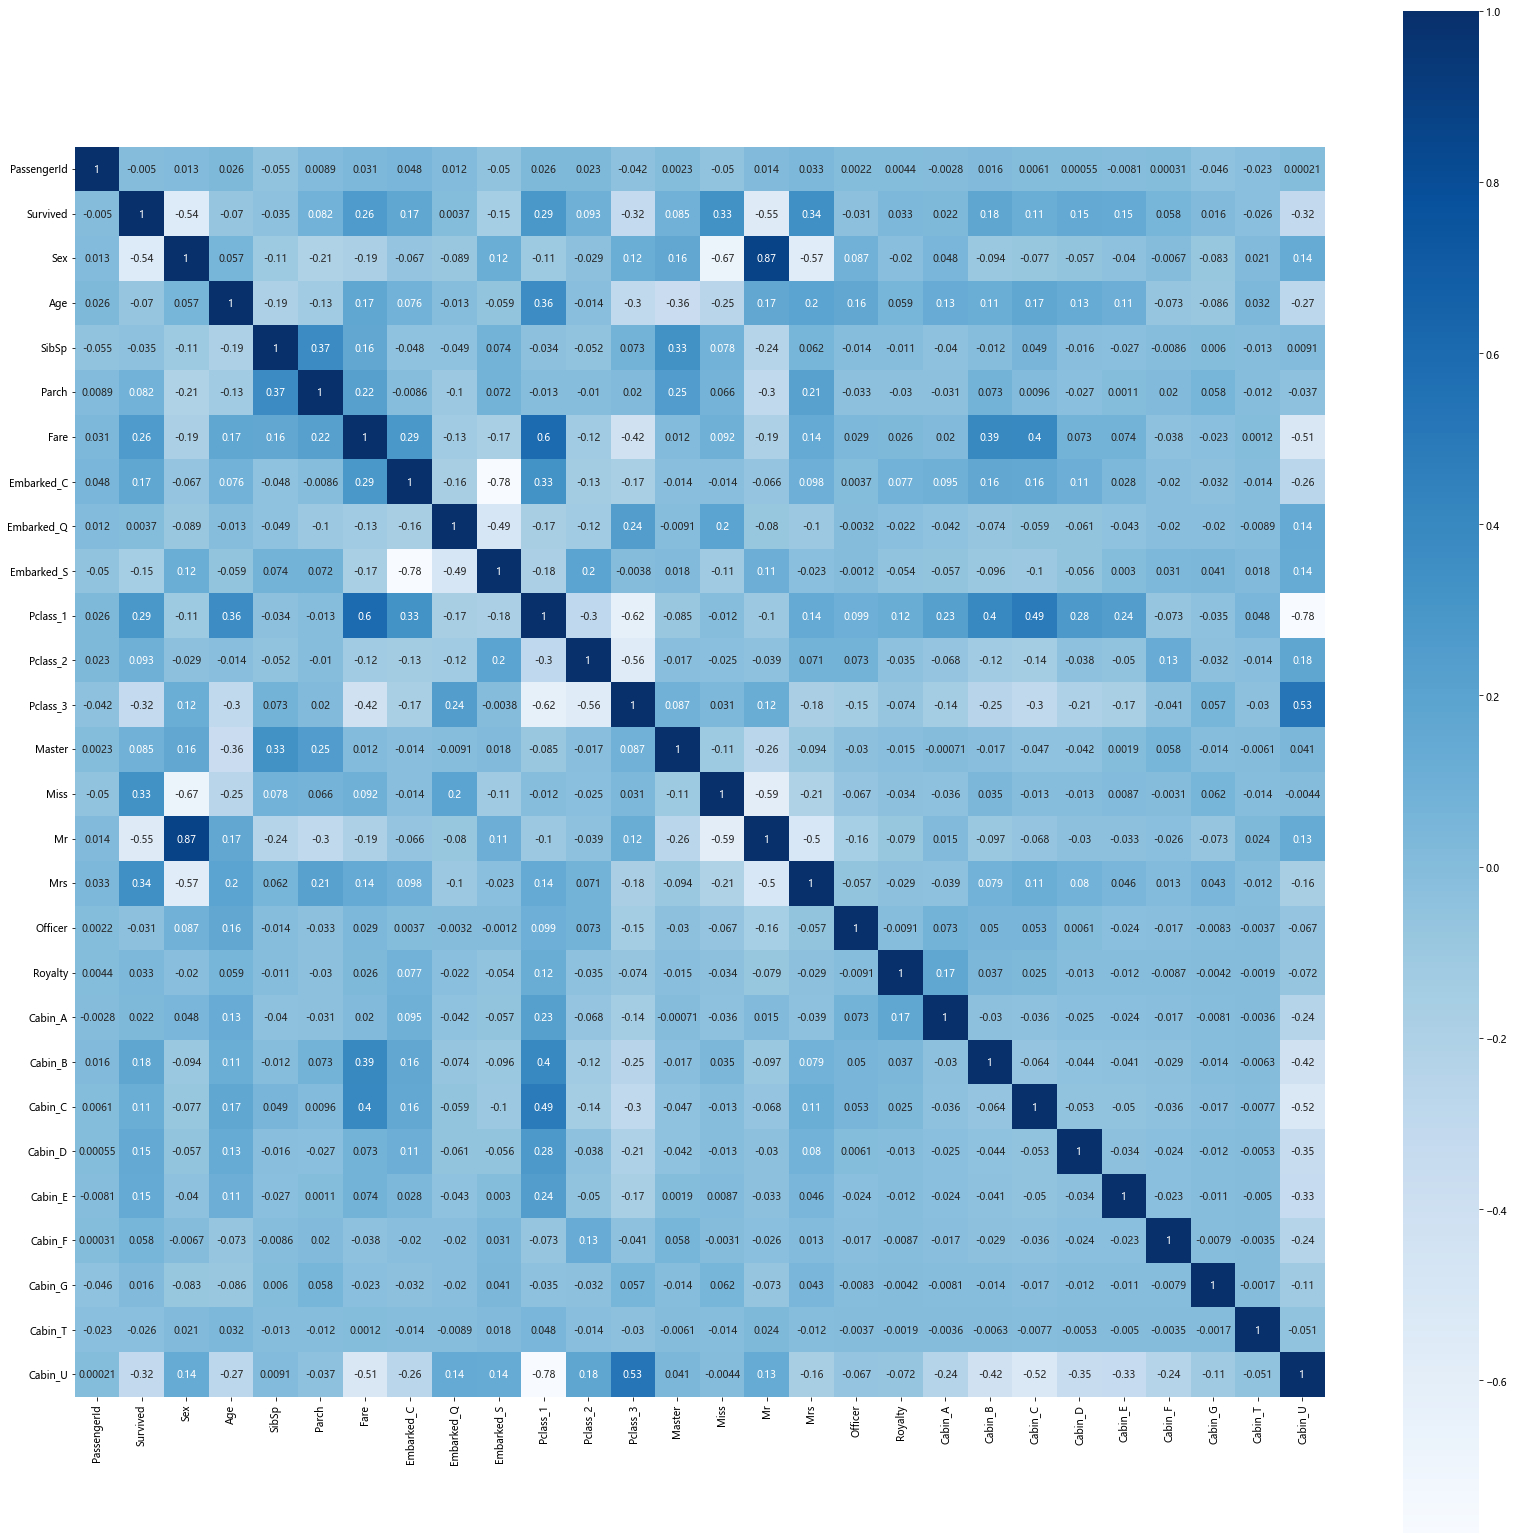

In [29]:
#相关系数图
import matplotlib.pyplot as plt
import seaborn as sns

plt.subplots(figsize=(28, 28))
sns.heatmap(corrDf, annot=True, vmax=1, square=True, cmap="Blues")
plt.savefig('./corr.jpg')
plt.show()

In [30]:
#根据正负相关性强弱，选取特征titleDf、pclassDf、familyDf、Fare、cabinDf、embarkedDf、Sex为特征。
#特征选择
full_X = pd.concat( [titleDf,#头衔
                     pclassDf,#客舱等级
                     familyDf,#家庭大小
                     full['Fare'],#船票价格
                     cabinDf,#船舱号
                     embarkedDf,#登船港口
                     full['Sex']#性别
                    ] , axis=1 )
full_X.head()

,Master,Miss,Mr,Mrs,Officer,Royalty,Pclass_1,Pclass_2,Pclass_3,FamilySize,...,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_T,Cabin_U,Embarked_C,Embarked_Q,Embarked_S,Sex
0,0,0,1,0,0,0,0,0,1,2,...,0,0,0,0,0,1,0,0,1,1
1,0,0,0,1,0,0,1,0,0,2,...,0,0,0,0,0,0,1,0,0,0
2,0,1,0,0,0,0,0,0,1,1,...,0,0,0,0,0,1,0,0,1,0
3,0,0,0,1,0,0,1,0,0,2,...,0,0,0,0,0,0,0,0,1,0
4,0,0,1,0,0,0,0,0,1,1,...,0,0,0,0,0,1,0,0,1,1


# 构建模型

建立训练数据集和测试数据集

In [31]:
#原始数据集有891行
sourceRow=891
#原始数据集：特征
source_X = full_X.loc[0:sourceRow-1,:]
#原始数据集：标签
source_y = full.loc[0:sourceRow-1,'Survived']   

#预测数据集：特征
pred_X = full_X.loc[sourceRow:,:]

In [32]:
from sklearn.model_selection import train_test_split

#建立模型用的训练数据集和测试数据集
train_X, test_X, train_y, test_y = train_test_split(source_X ,
                                                    source_y,
                                                    train_size=.8)
#输出数据集大小
print ('原始数据集特征：',source_X.shape, 
       '训练数据集特征：',train_X.shape ,
      '测试数据集特征：',test_X.shape)
print ('原始数据集标签：',source_y.shape, 
       '训练数据集标签：',train_y.shape ,
      '测试数据集标签：',test_y.shape)

原始数据集特征： (891, 27) 训练数据集特征： (712, 27) 测试数据集特征： (179, 27)
原始数据集标签： (891,) 训练数据集标签： (712,) 测试数据集标签： (179,)


选择机器学习算法 

In [33]:
#第1步：导入逻辑回归算法
from sklearn.linear_model import LogisticRegression
#第2步：创建模型：逻辑回归
model = LogisticRegression()
#第3步：训练模型
model.fit( train_X , train_y )
# 分类问题，score得到的是模型的正确率
model.score(test_X , test_y )

0.8268156424581006

In [34]:
#对预测数据集中的生存情况进行预测
pred_Y = model.predict(pred_X)

pred_Y=pred_Y.astype(int)
#乘客id
passenger_id = full.loc[sourceRow:,'PassengerId']
#数据框：乘客id，预测生存情况的值
predDf = pd.DataFrame( 
    { 'PassengerId': passenger_id , 
     'Survived': pred_Y } )
predDf.shape
predDf.head()
#保存结果
predDf.to_csv( 'titanic_pred.csv' , index = False )